#Case Study: House Price

The dataset represents a synthetic collection of house-related features and their corresponding prices. It contains 1000 samples, with each sample having the following features:

- Size: The size of the house
- Bedrooms: The number of bedrooms in the house
- Bathrooms: The number of bathrooms in the house
- Location: A feature representing the location of the house
- YearBuilt: The year the house was built
- RoofType: The type of roof on the house
- Price: The price of the house

## Load and Explore the Dataset

In [1]:
import pandas as pd
df = pd.read_csv('/content/house_prices_dataset.csv')
df

,Size,Bedrooms,Bathrooms,Location,YearBuilt,RoofType,Price
0,-0.325611,0.257199,0.007880,-0.164335,-0.240665,0.212093,-16.984913
1,-0.202193,1.277665,0.547097,-0.217681,-0.591571,1.098777,24.031693
2,-2.153731,0.975713,0.685858,0.446982,0.000756,-0.638586,57.305959
3,-0.939880,-1.304470,0.366598,-0.513867,0.669673,-1.059214,-81.049670
4,-0.570351,1.223083,0.352505,-1.820603,-0.258854,0.270057,-127.396000
...,...,...,...,...,...,...,...
995,NaN,0.689164,-0.273729,0.149598,-0.683634,0.097827,13.634300
996,-0.564079,-1.021233,0.243801,-1.280304,0.708356,0.872457,-138.161669
997,-0.981166,-1.725807,1.194109,-0.464404,-0.677565,0.462061,-94.896020
998,NaN,1.158596,0.963376,0.822060,-0.820682,1.896793,133.087712


Let's explore the dataset to better know what we're dealing with

In [2]:
# Question 1:
# Get the shape of the dataset
print("the shape is :\n",df.shape)

# Check the data types of the columns
print("the data types are :\n" , df.dtypes)


the shape is :
 (1000, 7)
the data types are :
 Size         float64
Bedrooms     float64
Bathrooms    float64
Location     float64
YearBuilt    float64
RoofType     float64
Price        float64
dtype: object


## Deeper Exploration

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Question 2:
# Check for missing values
print("Missing values are:\n" ,df.isnull().sum())


# Drop rows with NaN values
df = df.dropna()


# Check for missing values again
print("Missing values:\n", df.isnull().sum())

Missing values are:
 Size         200
Bedrooms     100
Bathrooms      0
Location       0
YearBuilt      0
RoofType       0
Price          0
dtype: int64
Missing values:
 Size         0
Bedrooms     0
Bathrooms    0
Location     0
YearBuilt    0
RoofType     0
Price        0
dtype: int64


This function sns.pairplot() creates scatter plots for each numerical feature (Size, Bedrooms, Bathrooms, Location, YearBuilt) against the target variable (Price).

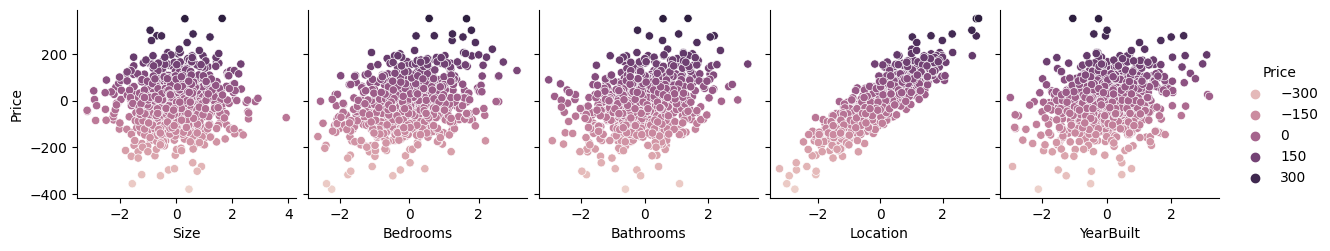

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Question 3:
# Create plots to better understand the data
sns.pairplot(x_vars = ('Size','Bedrooms','Bathrooms','Location','YearBuilt'), y_vars = "Price" , data =df , hue="Price")
plt.show()


from this output we can see that Price and Location have high positive correlation

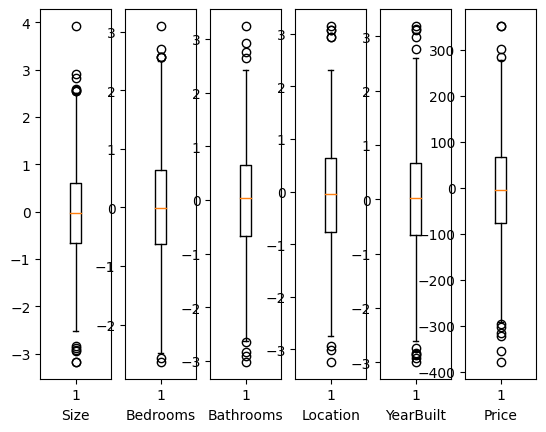

<Figure size 1000x300 with 0 Axes>

In [5]:
coloumns  = ['Size','Bedrooms','Bathrooms','Location','YearBuilt' , 'Price']
for index , i in enumerate(coloumns):
  plt.subplot(1,6,index+1)
  plt.boxplot(df[i])
  plt.xlabel(i)
plt.figure(figsize=(10,3))
plt.tight_layout()
plt.show()



From those box plots we could see that there are extreme values

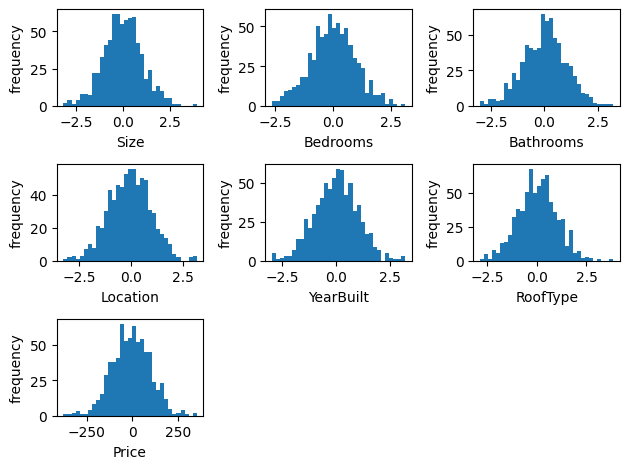

In [6]:
for index , i in enumerate(df.columns):
  plt.subplot(3,3,index+1)
  plt.hist(df[i], bins = 33 )
  plt.xlabel(i)
  plt.ylabel("frequency")

plt.tight_layout()
plt.show()

from those plots we could see that the data is normalized

## Predictive Modeling using Linear Regression

- Split the Data
- Train a Linear Regressor
- Evaluate it on the test set using any metric of your choice

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Question 4:
# Split the data into features (X) and target variable (y)
x = df.drop("Price", axis =1)
y = df["Price"]


# Split the data into training and testing sets
x_train , x_test ,y_train , y_test =train_test_split(x,y,test_size = 0.2 , random_state  = 13)


# Fit a linear regression model
model = LinearRegression()
model.fit(x_train , y_train)


LinearRegression()

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Question 5:
# Evaluate the model on the test set
y_predict = model.predict(x_test)

# Calculate evaluation metrics
r2 =r2_score(y_test , y_predict)
mse  =mean_squared_error(y_test , y_predict)

# Print the evaluation metrics
print("the mean squared error for this data is :", mse)# when it's closer to zero means it's accurate
print("the evaluation metrics using r2_score is: ",r2) #when it's closer to 1 means it's accurate


the mean squared error for this data is : 0.23779251060222117
the evaluation metrics using r2_score is:  0.9999793764205548


**from the output we can see that the model fit the data very well**

## Predictive Modeling using Logistic Regression

To utilize the same dataset for logistic regression, you need to transform the problem into a classification task. For example, you can introduce a threshold and classify the houses as "expensive" or "affordable" based on whether their prices are above or below the threshold. You can choose the threshold based on your dataset or specific requirements.

Convert the target variable into a binary variable (0 or 1) representing the classes (e.g., 0 for affordable, 1 for expensive). Then, train a logistic regression model using the same features to classify houses as either affordable or expensive based on the chosen threshold.

In [9]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Question 6:

# Set the median as a threshold to classify houses as "expensive" or "affordable"
threshold = df['Price'].median()

# Transform the problem into a classification task
df["Class"] = df["Price"].apply(lambda x: 1 if x >= threshold else 0)
df = df.drop("Price", axis=1)

# Split the data into features (X) and target variable (y)
x2 = df.drop("Class" , axis=1)
y2 = df["Class"]



# Split the data into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Fit a logistic regression model
classifier = LogisticRegression()
classifier.fit(x2_train , y2_train)
# Make predictions on the test set
y_pred = classifier.predict(x2_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y2_test , y_pred)
precision = precision_score(y2_test , y_pred)
recall = recall_score(y2_test , y_pred)
f1 = f1_score(y2_test , y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Accuracy: 0.9861111111111112
Precision: 0.9864864864864865
Recall: 0.9864864864864865
F1 score: 0.9864864864864865


<ipython-input-9-de5dcdd92f00>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Class"] = df["Price"].apply(lambda x: 1 if x >= threshold else 0)


**From  the output we could see that the model did a great job**

**i wrote the code below to transfare 0 and 1 to affordable and expensive in Class coloumn**

In [10]:
print(df.head())
classifies  ={1:"expensive" , 0: "affordable"}
df["Class"] = df["Class"].replace(classifies)
df.head()

       Size  Bedrooms  Bathrooms  Location  YearBuilt  RoofType  Class
0 -0.325611  0.257199   0.007880 -0.164335  -0.240665  0.212093      0
1 -0.202193  1.277665   0.547097 -0.217681  -0.591571  1.098777      1
2 -2.153731  0.975713   0.685858  0.446982   0.000756 -0.638586      1
3 -0.939880 -1.304470   0.366598 -0.513867   0.669673 -1.059214      0
4 -0.570351  1.223083   0.352505 -1.820603  -0.258854  0.270057      0


,Size,Bedrooms,Bathrooms,Location,YearBuilt,RoofType,Class
0,-0.325611,0.257199,0.007880,-0.164335,-0.240665,0.212093,affordable
1,-0.202193,1.277665,0.547097,-0.217681,-0.591571,1.098777,expensive
2,-2.153731,0.975713,0.685858,0.446982,0.000756,-0.638586,expensive
3,-0.939880,-1.304470,0.366598,-0.513867,0.669673,-1.059214,affordable
4,-0.570351,1.223083,0.352505,-1.820603,-0.258854,0.270057,affordable
